In [1]:
import os
import shutil
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO, YOLOWorld, RTDETR
from ultralytics.utils.plotting import Annotator

In [2]:
dataset_width = 640
dataset_height = 512
classes = {
  0: 'bike',
  1: 'car',
  2: 'light',
  3: 'motor',
  4: 'other vehicle',
  5: 'person',
  6: 'rider',
  7: 'sign',
  8: 'truck'
}

In [3]:
def denormalize(x, y, w, h, image_width, image_height):
    denorm_x = x * image_width
    denorm_y = y * image_height
    denorm_w = w * image_width
    denorm_h = h * image_height
    return denorm_x, denorm_y, denorm_w, denorm_h

def normalize(x, y, w, h, image_width, image_height):
    norm_x = x / image_width
    norm_y = y / image_height
    norm_w = w / image_width
    norm_h = h / image_height
    return norm_x, norm_y, norm_w, norm_h

In [4]:
def plot_image(image, bboxes):
  image_height, image_width, _ = image.shape
  annotator = Annotator(image)
  for bbox in bboxes:
      id_class, x, y, w, h = bbox
      class_name = classes[id_class]
      x, y, w, h = denormalize(x, y, w, h, image_width, image_height)
      
      x1 = int(x - w / 2)
      y1 = int(y - h / 2)
      x2 = int(x + w / 2)
      y2 = int(y + h / 2)

      annotator.box_label([x1,y1,x2,y2], class_name)
    
  plt.figure(figsize=(10, 10))
  plt.imshow(annotator.result())
  plt.axis('off')
  plt.show()

In [5]:
def load_bboxes(labels_path):
    bboxes = []
    with open(labels_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            id_class = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            bboxes.append((id_class, x_center, y_center, width, height))
    return bboxes

In [6]:
frame = '6nRzrZhdG7CQnPpeY'
dataset = 'filtered-data'
subset = 'test'
image_path = dataset + '/images/' + subset + '/' + frame + '.jpg'
labels_path = dataset + '/labels/' + subset + '/' + frame + '.txt'

In [7]:
#model_path = 'yolov8s-world.pt'
model_path = 'best-models/yolov8l-100-aug-2.pt'
model = YOLO(model_path)
#model = YOLOWorld(model_path)
#model = RTDETR(model_path)
results = model.predict(image_path)


image 1/1 /Users/leonardo/Documents/YOLO_FLIR/filtered-data/images/test/6nRzrZhdG7CQnPpeY.jpg: 512x640 8 cars, 1 light, 1 motor, 7 persons, 3 signs, 1606.4ms
Speed: 4.0ms preprocess, 1606.4ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)


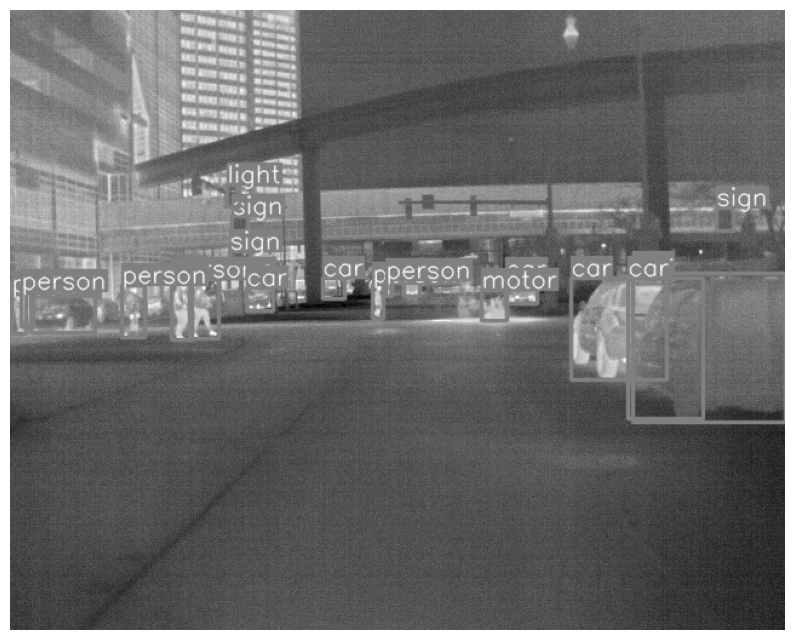

In [8]:
image = cv2.imread(image_path)
annotator = Annotator(image)
for box in results[0].boxes:
  xyxy = box.xyxy[0]

  classId = int(box.cls)
  class_name = classes[classId]
  #class_name = model.names[classId]

  annotator.box_label(xyxy, class_name)

plt.figure(figsize=(10, 10))
plt.imshow(annotator.result())
plt.axis('off')
plt.show()

In [ ]:
#image = cv2.imread(image_path)
#bboxes = load_bboxes(labels_path)
#plot_image(image, bboxes)